In [1]:
import pandas as pd
import numpy as np
import os

# Change to project root directory to avoid path issues
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"changed working directory to: {os.getcwd()}")

# Import custom module
from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "PEPEUSDT_5m_1h-pump05_230520_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2023-05-19 23:00:00,0.000002,0.000002,0.000002,0.000002,1.010320e+10,58.0,5.789667e+09,8858.190732,0,...,NaN,1.342209,0.006536,0.573053,NaN,NaN,NaN,0.146105,NaN,0.655172
1,2023-05-19 23:05:00,0.000002,0.000002,0.000002,0.000002,5.869778e+09,51.0,1.994195e+09,3051.118105,0,...,NaN,0.514553,0.006536,0.339739,NaN,NaN,NaN,-0.320521,NaN,0.655172
2,2023-05-19 23:10:00,0.000002,0.000002,0.000002,0.000002,2.746776e+10,85.0,7.618489e+09,11656.287963,0,...,NaN,0.383817,0.006579,0.277361,NaN,NaN,NaN,-0.445278,NaN,0.655172
3,2023-05-19 23:15:00,0.000002,0.000002,0.000002,0.000002,1.995368e+10,83.0,2.246299e+09,3436.838192,0,...,NaN,0.126857,0.006579,0.112576,NaN,NaN,NaN,-0.774849,NaN,0.655172
4,2023-05-19 23:20:00,0.000002,0.000002,0.000002,0.000002,8.747351e+09,63.0,2.861562e+09,4378.190470,0,...,NaN,0.486182,0.006536,0.327135,NaN,NaN,NaN,-0.345731,NaN,0.655172


In [2]:
# Initialize our ModelManager with symbol and date range
symbol = "PEPEUSDT"
start_date = "2023-05-20"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our ModelManager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close        volume  num_trades  \
 0       0.000002  0.000002  0.000002  0.000002  1.010320e+10        58.0   
 1       0.000002  0.000002  0.000002  0.000002  5.869778e+09        51.0   
 2       0.000002  0.000002  0.000002  0.000002  2.746776e+10        85.0   
 3       0.000002  0.000002  0.000002  0.000002  1.995368e+10        83.0   
 4       0.000002  0.000002  0.000002  0.000002  8.747351e+09        63.0   
 ...          ...       ...       ...       ...           ...         ...   
 179143  0.000013  0.000013  0.000013  0.000013  3.200064e+10       578.0   
 179144  0.000013  0.000013  0.000013  0.000013  8.794207e+09       375.0   
 179145  0.000013  0.000013  0.000013  0.000013  9.411552e+09       498.0   
 179146  0.000013  0.000013  0.000013  0.000013  1.539117e+10      1088.0   
 179147  0.000013  0.000013  0.000013  0.000013  5.672239e+09       647.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8395


np.float64(0.839526790786374)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8395
AUC-ROC Score: 0.9816

Overall Metrics:
Accuracy:  0.9506
Precision: 0.9500
Recall:    0.9506
F1-Score:  0.9459

Class 0 Metrics:
Precision: 0.9517
Recall:    0.9946
F1-Score:  0.9727

Class 1 Metrics:
Precision: 0.9366
Recall:    0.6109
F1-Score:  0.7395

Using raw probabilities
Classification threshold: 0.8395
{'accuracy': 0.9505844230991783, 'precision': 0.9499822129403842, 'recall': 0.9505844230991783, 'f1': 0.945928497062966, 'auc_roc': np.float64(0.9816061502874084), 'optimal_threshold': np.float64(0.839526790786374), 'precision_0': 0.9517137853390043, 'recall_0': 0.9946398221989803, 'f1_0': 0.9727034456306335, 'precision_1': 0.9366306027820711, 'recall_1': 0.6108870967741935, 'f1_1': 0.7394752898108603}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


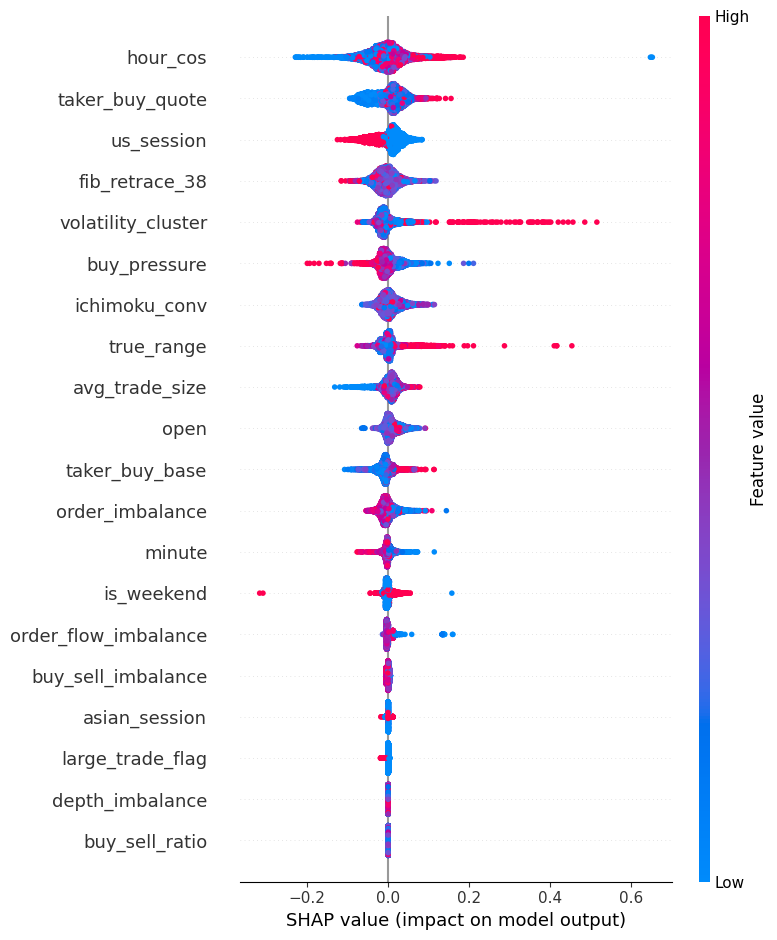


📈 Calculating feature importance...


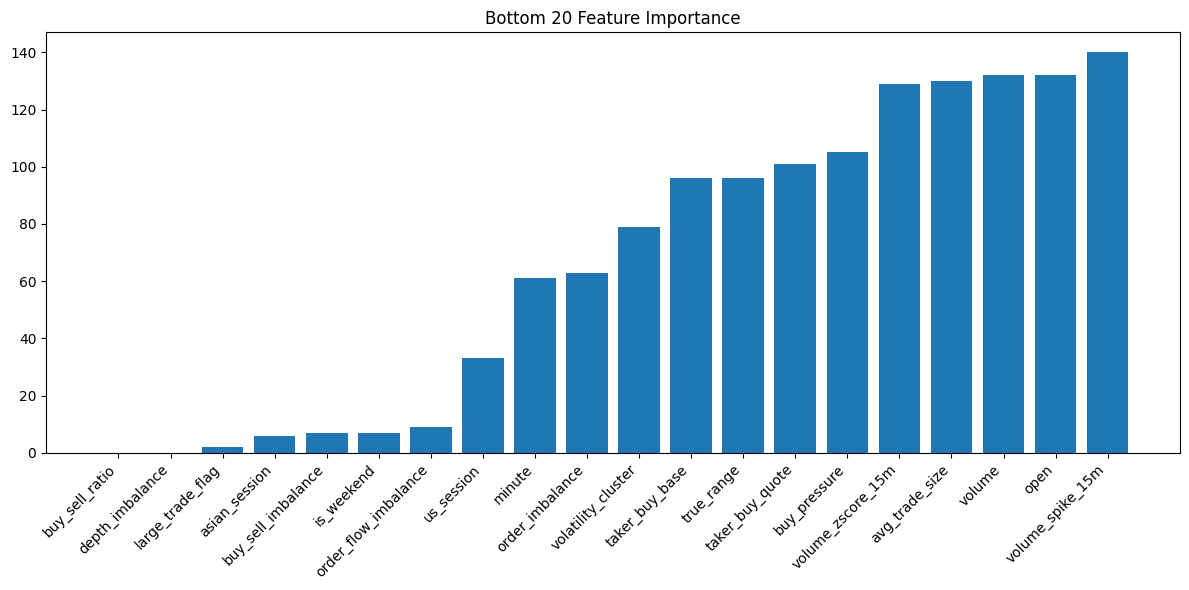

Found existing experiment
Identical result already exists for experiment ID: 3
Logged feature importance for experiment ID: 3


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()